In [15]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.io import imread
from skimage import img_as_float
from skimage.transform import resize

import lpips
import torch
from PIL import Image
from torchvision.transforms import ToTensor

def evaluate_images(original_path, super_res_path):
    # Loading images
    original = img_as_float(imread(original_path))
    super_res = img_as_float(imread(super_res_path))
    
    # resizing the sr images if needed
    if original.shape != super_res.shape:
        super_res = resize(super_res, original.shape, anti_aliasing=True)

    # Calculate PSNR, SSIM and MSE
    psnr_value = psnr(original, super_res, data_range=original.max() - original.min())
    ssim_value = ssim(original, super_res, win_size=5, data_range= 1 ,channel_axis=-1)
    mse_value = mse(original, super_res)
    
    return psnr_value, ssim_value, mse_value

def load_image_as_tensor(image_path):
    image = Image.open(image_path).convert('RGB')
    tensor = ToTensor()(image).unsqueeze(0)  # Add batch dimension
    return tensor

def evaluate_lpips(original_path, super_res_path, model = lpips.LPIPS(net='alex')):
    
    # load images as tensors
    image1 = load_image_as_tensor(original_path)
    image2 = load_image_as_tensor(super_res_path)  

    image1, image2 = image1.cuda(), image2.cuda()
    model = model.cuda()  

    with torch.no_grad():
        distance = model(image1, image2)

    return distance.item()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\zhujy\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\zhujy\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\zhujy\AppData\Roaming\Python\Python311\site-packages\lpips\weights\v0.1\alex.pth


In [63]:
import os

original_folder = r"..\DIV2K_valid_HR\DIV2K_valid_HR"
super_res_folder = "validation_output"

# loading alex model for lpips eval
lpips_model = lpips.LPIPS(net='alex')

psnr_aver, ssim_aver, mse_aver, lpips_aver = [], [], [], []

# Assuming file names are consistent between folders
for file_name in os.listdir(super_res_folder):

    # trimming the output file name
    file_name_s = file_name[:-6] + file_name[-4:]

    original_path = os.path.join(original_folder, file_name_s)
    super_res_path = os.path.join(super_res_folder, file_name)

    # Evaluate images
    psnr_value, ssim_value, mse_value = evaluate_images(original_path, super_res_path)
    lpips_value = evaluate_lpips(original_path, super_res_path)
    
    psnr_aver.append(psnr_value)
    ssim_aver.append(ssim_value)
    mse_aver.append(mse_value)
    lpips_aver.append(lpips_value)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\zhujy\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\zhujy\AppData\Roaming\Python\Python311\site-packages\lpips\weights\v0.1\alex.pth


In [64]:

print(f"PSNR = {np.mean(psnr_aver)}, SSIM = {np.mean(ssim_aver)}, MSE = {np.mean(mse_aver)}, LPIPS = {np.mean(lpips_aver)}")
print(f"PSNR = {np.min(psnr_aver)}, SSIM = {np.min(ssim_aver)}, MSE = {np.max(mse_aver)}, LPIPS = {np.max(lpips_aver)}")


PSNR = 25.75511919968427, SSIM = 0.6955485732967995, MSE = 0.0033952755938017284, LPIPS = 0.17875550128519535
PSNR = 18.419705661402272, SSIM = 0.332301333047278, MSE = 0.014388960946473352, LPIPS = 0.3721003234386444


In [56]:
import matplotlib.pyplot as plt
from PIL import Image , ImageDraw

# display images
sr_image_path1 = "../DIV2K_valid_HR/DIV2K_valid_HR/0806.png"
lq_image_path1 = "../DIV2K_valid_LR_bicubic_X4/DIV2K_valid_LR_bicubic/X4/0806x4.png"
lq_image_path2 = "../DIV2K_train_LR_bicubic_X4/DIV2K_train_LR_bicubic/X4/0120x4.png"
sr_image_path2 = "../DIV2K_train_HR/DIV2K_train_HR/0120.png"

out_1 = 'validation_output/0806x4.png'

# Load images
lq_img1 = Image.open(lq_image_path1)
sr_img1 = Image.open(sr_image_path1)
lq_img2 = Image.open(lq_image_path2)
sr_img2 = Image.open(sr_image_path2)
lq_img12 = Image.open(lq_image_path1)
sr_img12 = Image.open(sr_image_path1)

out_img1 = Image.open(out_1)
out_img12 = Image.open(out_1)

psnr_value, ssim_value, mse_value = evaluate_images(sr_image_path1, lq_image_path1)
#lpips_value = evaluate_lpips(lq_image_path1, sr_image_path1)


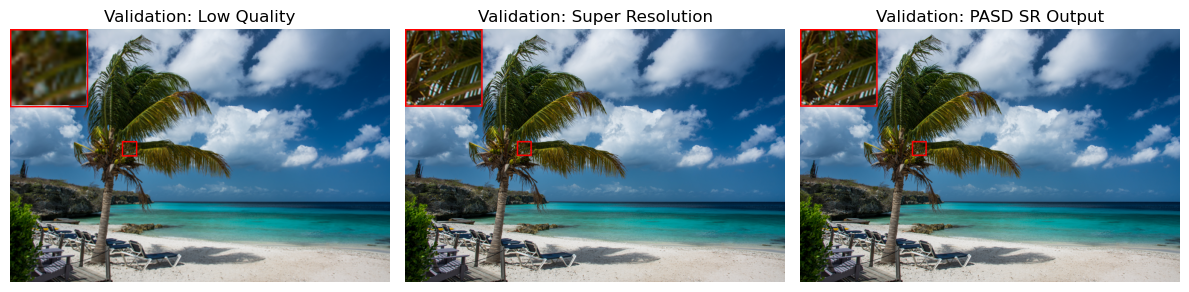

<Figure size 640x480 with 0 Axes>

In [59]:
roi = (150, 150, 170, 170)
roi2 = (600,600,680,680)
# Crop the ROI from both images
lq_cropped = lq_img1.crop(roi)
sr_cropped = sr_img1.crop(roi2)
out_cropped = out_img1.crop(roi2)

# Scale up the cropped regions for better visibility
scale_factor = 5
lq_cropped_scaled = lq_cropped.resize((lq_cropped.width * scale_factor, lq_cropped.height * scale_factor))
sr_cropped_scaled = sr_cropped.resize((sr_cropped.width * scale_factor, sr_cropped.height * scale_factor))
out_cropped_scaled = out_cropped.resize((out_cropped.width * scale_factor, out_cropped.height * scale_factor))

# Draw red rectangles
draw_lq = ImageDraw.Draw(lq_img12)
draw_sr = ImageDraw.Draw(sr_img12)
draw_lq.rectangle(roi, outline="red", width=2)
draw_sr.rectangle(roi2, outline="red", width=8)
draw_lq.rectangle((0,0,104,104), outline="red", width=2)
draw_sr.rectangle((0,0,416,416), outline="red", width=8)

draw_out = ImageDraw.Draw(out_img12)
draw_out.rectangle(roi2, outline="red", width=8)
draw_out.rectangle((0,0,104,104), outline="red", width=8)

# Overlaying scaled up images
overlay_position = (2, 2)
overlay_position2 = (8, 8)
lq_img12.paste(lq_cropped_scaled, overlay_position)
sr_img12.paste(sr_cropped_scaled, overlay_position2)
out_img12.paste(sr_cropped_scaled, overlay_position2)

fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 

axs[0].imshow(lq_img12)
axs[0].set_title('Validation: Low Quality')
axs[0].axis('off')

axs[1].imshow(sr_img12)
axs[1].set_title('Validation: Super Resolution')
axs[1].axis('off')

axs[2].imshow(sr_img12)
axs[2].set_title('Validation: PASD SR Output')
axs[2].axis('off')

plt.tight_layout()
plt.show()

plt.savefig('dataset_out/0006.png')
